In [ ]:
# pip install imbalanced-learn

**Mount Drive**# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as plt
%matplotlib inline
import seaborn as sns


In [3]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [4]:
# from imblearn.combine import smotetomek
from imblearn.combine import SMOTETomek

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
train_targets_scored = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle_MoA/train_targets_scored.csv/train_targets_scored.csv')
train_targets_nonscored = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle_MoA/train_targets_nonscored.csv/train_targets_nonscored.csv')

In [6]:
train_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle_MoA/train_features.csv')
train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [7]:
# No of cols
len(train_features.columns)

876

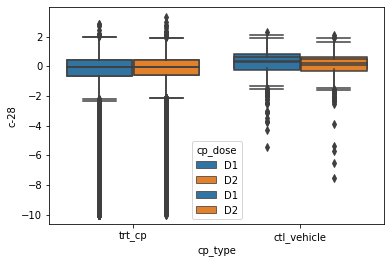

In [8]:
ax = sns.boxplot(x = 'cp_type',y = train_features['c-27'],hue=  'cp_dose', data = train_features)
ax = sns.boxplot(x = 'cp_type',y = train_features['c-28'],hue = 'cp_dose', data = train_features )
# ax.set(ylim=(-180, 240))
# Paste or type your script code here:

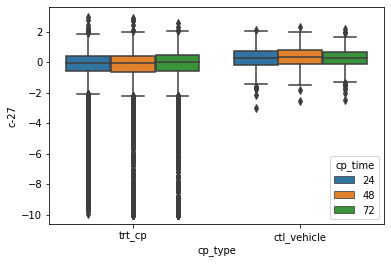

In [ ]:
ax = sns.boxplot(x = 'cp_type',y = train_features['c-27'],hue=  'cp_time', data = train_features)

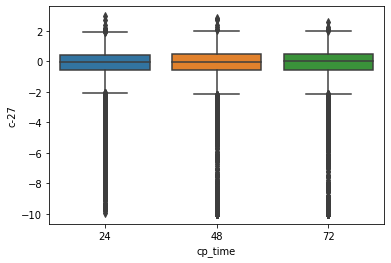

In [ ]:
ax = sns.boxplot(x = 'cp_time',y = train_features['c-27'], data = train_features)

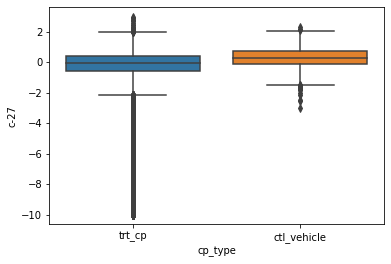

In [ ]:
ax = sns.boxplot(x = 'cp_type',y = train_features['c-27'], data = train_features)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


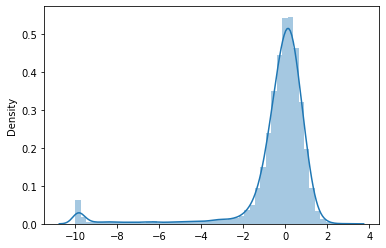

In [ ]:
# float(train_features['c-27'].iloc[2])
# sns.distplot(train_features, [1,3,5,2,3,24,13,32,1,23,1,3])
# sns.distplot(train_features, np.float(train_features['c-27'].iloc[:3]))

# sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
# x = np.random.randn(100)
ax = sns.distplot(np.array(train_features['c-27']))


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


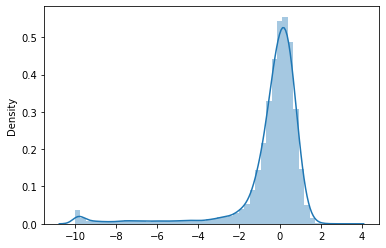

In [ ]:
ax = sns.distplot(np.array(train_features['c-28']))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


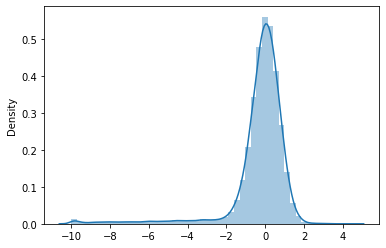

In [ ]:
ax = sns.distplot(np.array(train_features['c-29']))

In [ ]:
# sns.pairplot(train_features[['c-17','c-18','c-19','c-20','c-21','c-22','c-23','c-24','c-25','c-26','c-27','c-28']])

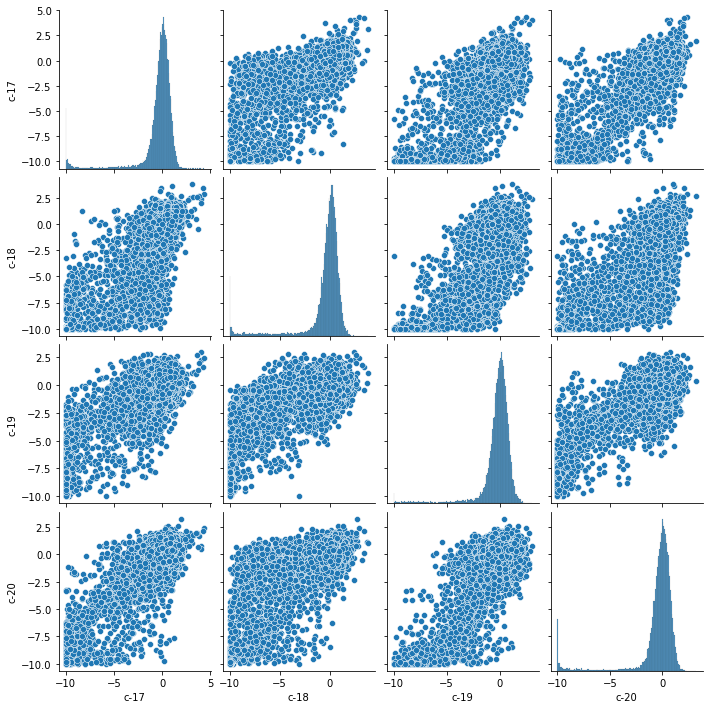

In [ ]:
sns.pairplot(train_features[['c-17','c-18','c-19','c-20']])

In [ ]:
train_targets_nonscored.head()

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,aldehyde_dehydrogenase_activator,aldose_reductase_inhibitor,alpha_mannosidase_inhibitor,ampk_inhibitor,androgen_biosynthesis_inhibitor,angiotensin_receptor_agonist,antacid,anthelmintic,antihypertensive,antimetabolite,antipruritic,antirheumatic_drug,antiseptic,antispasmodic,antithyroid_agent,antitussive,anxiolytic,ap_inhibitor,apolipoprotein_expression_enhancer,apoptosis_inhibitor,arf_inhibitor,aryl_hydrocarbon_receptor_agonist,aryl_hydrocarbon_receptor_antagonist,aspartic_protease_inhibitor,atherogenesis_inhibitor,atherosclerosis_formation_inhibitor,atp-sensitive_potassium_channel_agonist,atp-sensitive_potassium_channel_inhibitor,atp_channel_activator,atp_channel_blocker,...,thromboxane_synthase_inhibitor,thyroid_hormone_inhibitor,thyroid_hormone_stimulant,thyrotropin_releasing_hormone_receptor_agonist,tie_inhibitor,tissue_transglutaminase_inhibitor,topical_anesthetic,topical_sunscreen_agent,trace_amine_associated_receptor_agonist,trace_amine_associated_receptor_antagonist,trail_modulator,transient_receptor_potential_channel_agonist,triacylglycerol_lipase_inhibitor,tricyclic_antidepressant,tryptophan_hydroxylase_inhibitor,tyrosinase_inhibitor,tyrosine_hydroxylase_inhibitor,tyrosine_phosphatase_inhibitor,ubiquitin-conjugating_enzyme_inhibitor,ubiquitin_ligase_inhibitor,urease_inhibitor,uric_acid_diuretic,uricase_inhibitor,uricosuric,urotensin_receptor_agonist,urotensin_receptor_antagonist,vasoconstrictor,vasodilator,vasopressin_receptor_agonist,vasopressin_receptor_antagonist,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_scored = train_features.merge(train_targets_scored, 'inner', ['sig_id'])

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train_scored.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-58,g-59,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-72,g-73,g-74,g-75,g-76,g-77,g-78,g-79,g-80,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-88,g-89,g-90,g-91,g-92,g-93,g-94,g-95,g-96,g-97,g-98,g-99,g-100,g-101,g-102,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-113,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-121,g-122,g-123,g-124,g-125,g-126,g-127,g-128,g-129,g-130,g-131,g-132,g-133,g-134,g-135,g-136,g-137,g-138,g-139,g-140,g-141,g-142,g-143,g-144,g-145,g-146,g-147,g-148,g-149,g-150,g-151,g-152,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-163,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-177,g-178,g-179,g-180,g-181,g-182,g-183,g-184,g-185,g-186,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-195,g-196,g-197,g-198,g-199,g-200,g-201,g-202,g-203,g-204,g-205,g-206,g-207,g-208,g-209,g-210,g-211,g-212,g-213,g-214,g-215,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-228,g-229,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-243,g-244,g-245,g-246,g-247,g-248,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-257,g-258,g-259,g-260,g-261,g-262,g-263,g-264,g-265,g-266,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-291,g-292,g-293,g-294,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-314,g-315,g-316,g-317,g-318,g-319,g-320,g-321,g-322,g-323,g-324,g-325,g-326,g-327,g-328,g-329,g-330,g-331,g-332,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-349,g-350,g-351,g-352,g-353,g-354,g-355,g-356,g-357,g-358,g-359,g-360,g-361,g-362,g-363,g-364,g-365,g-366,g-367,g-368,g-369,g-370,g-371,g-372,g-373,g-374,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-385,g-386,g-387,g-388,g-389,g-390,g-391,g-392,g-393,g-394,g-395,g-396,g-397,g-398,g-399,g-400,g-401,g-402,g-403,g-404,g-405,g-406,g-407,g-408,g-409,g-410,g-411,g-412,g-413,g-414,g-415,g-416,g-417,g-418,g-419,g-420,g-421,g-422,g-423,g-424,g-425,g-426,g-427,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-443,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-460,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-478,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-489,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-512,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-523,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-531,g-532,g-533,g-534,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-546,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-561,g-562,g-563,g-564,g-565,g-566,g-567,g-568,g-569,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-588,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-619,g-620,g-621,g-622,g-623,g-624,g-625,g-626,g-627,g-628,g-629,g-630,g-631,g-632,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-664,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-672,g-673,g-674,g-675,g-676,g-677,g-678,g-67

In [ ]:
# print(train_scored.columns.tolist())

In [ ]:
len(train_scored.iloc[:,876:1083].head().columns)

206

In [ ]:
train_scored['combined'] = train_scored.iloc[:,876:1082].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
# df['combined'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
# train_scored['combined']

In [ ]:
print(len(pd.unique(train_scored['combined'])) )


328


In [ ]:
# pd.unique(train_scored['combined'])

In [ ]:
train_scored.shape

(23814, 1083)

In [ ]:
# train_df_x = train_scored.iloc[:,4:876]
train_df_x1 = train_scored.iloc[:,4:92]
train_df_x2 = train_scored.iloc[:,93:181]
train_df_x3 = train_scored.iloc[:,182:270]
train_df_x4 = train_scored.iloc[:,271:359]
train_df_x5 = train_scored.iloc[:,360:447]
train_df_x6 = train_scored.iloc[:,448:535]
train_df_x7 = train_scored.iloc[:,536:623]
train_df_x8 = train_scored.iloc[:,624:711]
train_df_x9 = train_scored.iloc[:,712:799]
train_df_x10 = train_scored.iloc[:,800:876]

In [ ]:
train_df_x4.shape

(23814, 88)

In [ ]:
train_df_y = train_scored.iloc[:,1082]

# FEATURE ENGINEERING

In [ ]:
# pip install statsmodels;

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_list = [train_df_x1,
train_df_x2,
train_df_x3,
train_df_x4,
train_df_x5,
train_df_x6,
train_df_x7,
train_df_x8,
train_df_x9,
train_df_x10]
# df_list = [train_df_x1,train_df_x2]

In [ ]:
col_list = []
for df in df_list:
  vif = pd.DataFrame()
  # vif['Features'] = X_train_rfe.columns
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif['colname'] = df.columns
  vif = vif[vif['VIF']<5]
  print(col_list)
  col_list.extend(vif['colname'])

[]
['g-0', 'g-1', 'g-2', 'g-3', 'g-4', 'g-5', 'g-6', 'g-7', 'g-8', 'g-9', 'g-10', 'g-11', 'g-12', 'g-13', 'g-14', 'g-15', 'g-16', 'g-17', 'g-18', 'g-19', 'g-20', 'g-21', 'g-22', 'g-23', 'g-24', 'g-25', 'g-26', 'g-27', 'g-28', 'g-29', 'g-30', 'g-31', 'g-32', 'g-33', 'g-34', 'g-35', 'g-36', 'g-39', 'g-40', 'g-41', 'g-42', 'g-43', 'g-44', 'g-45', 'g-46', 'g-47', 'g-48', 'g-49', 'g-51', 'g-52', 'g-53', 'g-54', 'g-55', 'g-56', 'g-57', 'g-58', 'g-59', 'g-60', 'g-61', 'g-62', 'g-64', 'g-65', 'g-66', 'g-67', 'g-68', 'g-69', 'g-70', 'g-71', 'g-73', 'g-74', 'g-76', 'g-77', 'g-78', 'g-79', 'g-80', 'g-81', 'g-82', 'g-83', 'g-84', 'g-85', 'g-86', 'g-87']
['g-0', 'g-1', 'g-2', 'g-3', 'g-4', 'g-5', 'g-6', 'g-7', 'g-8', 'g-9', 'g-10', 'g-11', 'g-12', 'g-13', 'g-14', 'g-15', 'g-16', 'g-17', 'g-18', 'g-19', 'g-20', 'g-21', 'g-22', 'g-23', 'g-24', 'g-25', 'g-26', 'g-27', 'g-28', 'g-29', 'g-30', 'g-31', 'g-32', 'g-33', 'g-34', 'g-35', 'g-36', 'g-39', 'g-40', 'g-41', 'g-42', 'g-43', 'g-44', 'g-45', 'g-46',

In [ ]:
# col_list
len(col_list)
# 742 columns

742

In [ ]:
train_df_x11 = train_scored[col_list[0:248]]
train_df_x12 = train_scored[col_list[249:496]]
train_df_x13 = train_scored[col_list[497:]]

In [ ]:
df_list_1 = [train_df_x11, train_df_x12, train_df_x13]

In [ ]:
col_list1 = []
for df in df_list_1:
  vif = pd.DataFrame()
  # vif['Features'] = X_train_rfe.columns
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif['colname'] = df.columns
  vif = vif[vif['VIF']<5]
  # print(col_list1)
  col_list1.extend(vif['colname'])

In [ ]:
len(col_list1)
# 696

696

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/Kaggle_MoA/ColumnsListAfter2ndRun.txt", "w") as output:
    output.write(str(col_list1))

In [ ]:
# Doing it with 348 cols in each dataframe

In [ ]:
train_df_x111 = train_scored[col_list1[0:348]]
train_df_x112 = train_scored[col_list1[349:]]

In [ ]:
df_list_11 = [train_df_x111, train_df_x112]

In [ ]:
col_list11 = []
for df in df_list_11:
  vif = pd.DataFrame()
  # vif['Features'] = X_train_rfe.columns
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif['colname'] = df.columns
  vif = vif[vif['VIF']<5]
  # print(col_list1)
  col_list11.extend(vif['colname'])

In [ ]:
len(col_list11)

679

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/Kaggle_MoA/ColumnsListAfter3rdRun.txt", "w") as output:
    output.write(str(col_list11))

In [ ]:
# Read from file
f = open("/content/drive/MyDrive/Colab Notebooks/Kaggle_MoA/ColumnsListAfter3rdRun.txt", "r")
col_list11 = f.read()

In [ ]:
col_list11

"['g-1', 'g-2', 'g-3', 'g-4', 'g-5', 'g-6', 'g-7', 'g-9', 'g-10', 'g-11', 'g-12', 'g-13', 'g-14', 'g-15', 'g-16', 'g-17', 'g-18', 'g-19', 'g-20', 'g-21', 'g-22', 'g-23', 'g-24', 'g-25', 'g-26', 'g-27', 'g-28', 'g-29', 'g-30', 'g-31', 'g-32', 'g-33', 'g-34', 'g-35', 'g-36', 'g-39', 'g-40', 'g-41', 'g-42', 'g-43', 'g-44', 'g-45', 'g-46', 'g-47', 'g-48', 'g-49', 'g-51', 'g-52', 'g-53', 'g-54', 'g-55', 'g-56', 'g-57', 'g-59', 'g-60', 'g-61', 'g-62', 'g-64', 'g-65', 'g-66', 'g-67', 'g-68', 'g-69', 'g-70', 'g-71', 'g-73', 'g-74', 'g-76', 'g-77', 'g-78', 'g-79', 'g-81', 'g-82', 'g-83', 'g-84', 'g-85', 'g-86', 'g-87', 'g-89', 'g-90', 'g-92', 'g-93', 'g-94', 'g-95', 'g-96', 'g-98', 'g-99', 'g-101', 'g-103', 'g-104', 'g-105', 'g-106', 'g-107', 'g-108', 'g-109', 'g-110', 'g-111', 'g-112', 'g-114', 'g-115', 'g-116', 'g-117', 'g-118', 'g-119', 'g-120', 'g-122', 'g-124', 'g-125', 'g-126', 'g-127', 'g-129', 'g-130', 'g-133', 'g-134', 'g-135', 'g-136', 'g-137', 'g-138', 'g-141', 'g-142', 'g-143', 'g-1

In [ ]:
# Manual copy paste
col_list11 = ['g-1', 'g-2', 'g-3', 'g-4', 'g-5', 'g-6', 'g-7', 'g-9', 'g-10', 'g-11', 'g-12', 'g-13', 'g-14', 'g-15', 'g-16', 'g-17', 'g-18', 'g-19', 'g-20', 'g-21', 'g-22', 'g-23', 'g-24', 'g-25', 'g-26', 'g-27', 'g-28', 'g-29', 'g-30', 'g-31', 'g-32', 'g-33', 'g-34', 'g-35', 'g-36', 'g-39', 'g-40', 'g-41', 'g-42', 'g-43', 'g-44', 'g-45', 'g-46', 'g-47', 'g-48', 'g-49', 'g-51', 'g-52', 'g-53', 'g-54', 'g-55', 'g-56', 'g-57', 'g-59', 'g-60', 'g-61', 'g-62', 'g-64', 'g-65', 'g-66', 'g-67', 'g-68', 'g-69', 'g-70', 'g-71', 'g-73', 'g-74', 'g-76', 'g-77', 'g-78', 'g-79', 'g-81', 'g-82', 'g-83', 'g-84', 'g-85', 'g-86', 'g-87', 'g-89', 'g-90', 'g-92', 'g-93', 'g-94', 'g-95', 'g-96', 'g-98', 'g-99', 'g-101', 'g-103', 'g-104', 'g-105', 'g-106', 'g-107', 'g-108', 'g-109', 'g-110', 'g-111', 'g-112', 'g-114', 'g-115', 'g-116', 'g-117', 'g-118', 'g-119', 'g-120', 'g-122', 'g-124', 'g-125', 'g-126', 'g-127', 'g-129', 'g-130', 'g-133', 'g-134', 'g-135', 'g-136', 'g-137', 'g-138', 'g-141', 'g-142', 'g-143', 'g-145', 'g-146', 'g-148', 'g-149', 'g-150', 'g-151', 'g-153', 'g-154', 'g-155', 'g-156', 'g-157', 'g-158', 'g-159', 'g-160', 'g-161', 'g-162', 'g-164', 'g-165', 'g-166', 'g-167', 'g-168', 'g-169', 'g-170', 'g-171', 'g-172', 'g-173', 'g-174', 'g-175', 'g-176', 'g-179', 'g-180', 'g-181', 'g-182', 'g-183', 'g-184', 'g-187', 'g-188', 'g-189', 'g-190', 'g-191', 'g-192', 'g-193', 'g-194', 'g-196', 'g-197', 'g-198', 'g-199', 'g-200', 'g-202', 'g-203', 'g-204', 'g-205', 'g-207', 'g-208', 'g-209', 'g-210', 'g-211', 'g-212', 'g-214', 'g-216', 'g-217', 'g-218', 'g-219', 'g-220', 'g-221', 'g-222', 'g-223', 'g-224', 'g-225', 'g-226', 'g-227', 'g-230', 'g-231', 'g-232', 'g-233', 'g-234', 'g-235', 'g-236', 'g-237', 'g-238', 'g-239', 'g-240', 'g-241', 'g-242', 'g-244', 'g-245', 'g-246', 'g-247', 'g-249', 'g-250', 'g-251', 'g-252', 'g-253', 'g-254', 'g-255', 'g-256', 'g-258', 'g-260', 'g-262', 'g-263', 'g-265', 'g-267', 'g-268', 'g-269', 'g-270', 'g-271', 'g-272', 'g-273', 'g-274', 'g-275', 'g-276', 'g-277', 'g-278', 'g-279', 'g-280', 'g-281', 'g-282', 'g-283', 'g-284', 'g-285', 'g-286', 'g-287', 'g-288', 'g-289', 'g-290', 'g-292', 'g-293', 'g-295', 'g-296', 'g-297', 'g-298', 'g-299', 'g-300', 'g-301', 'g-302', 'g-303', 'g-304', 'g-305', 'g-306', 'g-307', 'g-308', 'g-309', 'g-310', 'g-311', 'g-312', 'g-313', 'g-315', 'g-316', 'g-317', 'g-318', 'g-319', 'g-321', 'g-322', 'g-323', 'g-324', 'g-325', 'g-326', 'g-329', 'g-330', 'g-331', 'g-333', 'g-334', 'g-335', 'g-336', 'g-337', 'g-338', 'g-339', 'g-340', 'g-341', 'g-342', 'g-343', 'g-344', 'g-345', 'g-346', 'g-347', 'g-348', 'g-350', 'g-351', 'g-352', 'g-354', 'g-356', 'g-357', 'g-358', 'g-360', 'g-361', 'g-362', 'g-363', 'g-364', 'g-366', 'g-367', 'g-370', 'g-371', 'g-372', 'g-373', 'g-375', 'g-376', 'g-377', 'g-378', 'g-379', 'g-380', 'g-381', 'g-382', 'g-383', 'g-384', 'g-387', 'g-388', 'g-389', 'g-390', 'g-391', 'g-393', 'g-394', 'g-395', 'g-396', 'g-397', 'g-398', 'g-400', 'g-401', 'g-402', 'g-403', 'g-404', 'g-405', 'g-408', 'g-409', 'g-412', 'g-413', 'g-414', 'g-415', 'g-416', 'g-418', 'g-419', 'g-420', 'g-421', 'g-422', 'g-424', 'g-425', 'g-426', 'g-428', 'g-429', 'g-430', 'g-431', 'g-432', 'g-433', 'g-434', 'g-435', 'g-436', 'g-437', 'g-438', 'g-439', 'g-440', 'g-441', 'g-442', 'g-444', 'g-445', 'g-446', 'g-447', 'g-448', 'g-449', 'g-450', 'g-451', 'g-452', 'g-453', 'g-454', 'g-455', 'g-456', 'g-457', 'g-458', 'g-459', 'g-461', 'g-462', 'g-463', 'g-464', 'g-465', 'g-466', 'g-467', 'g-468', 'g-469', 'g-470', 'g-471', 'g-472', 'g-473', 'g-474', 'g-475', 'g-476', 'g-477', 'g-479', 'g-480', 'g-481', 'g-482', 'g-483', 'g-484', 'g-485', 'g-486', 'g-487', 'g-488', 'g-490', 'g-491', 'g-492', 'g-493', 'g-494', 'g-495', 'g-496', 'g-497', 'g-498', 'g-499', 'g-500', 'g-501', 'g-502', 'g-503', 'g-504', 'g-505', 'g-506', 'g-507', 'g-508', 'g-509', 'g-510', 'g-511', 'g-513', 'g-514', 'g-515', 'g-516', 'g-517', 'g-518', 'g-519', 'g-520', 'g-521', 'g-522', 'g-524', 'g-525', 'g-526', 'g-527', 'g-528', 'g-529', 'g-530', 'g-532', 'g-533', 'g-535', 'g-536', 'g-537', 'g-538', 'g-539', 'g-540', 'g-541', 'g-542', 'g-543', 'g-544', 'g-545', 'g-547', 'g-548', 'g-549', 'g-550', 'g-551', 'g-552', 'g-553', 'g-554', 'g-555', 'g-556', 'g-557', 'g-558', 'g-559', 'g-560', 'g-562', 'g-563', 'g-564', 'g-565', 'g-566', 'g-567', 'g-570', 'g-571', 'g-572', 'g-573', 'g-574', 'g-575', 'g-576', 'g-577', 'g-578', 'g-579', 'g-580', 'g-581', 'g-582', 'g-583', 'g-584', 'g-585', 'g-586', 'g-587', 'g-589', 'g-590', 'g-591', 'g-592', 'g-593', 'g-594', 'g-595', 'g-596', 'g-597', 'g-598', 'g-599', 'g-600', 'g-601', 'g-602', 'g-603', 'g-604', 'g-605', 'g-606', 'g-607', 'g-608', 'g-609', 'g-610', 'g-611', 'g-612', 'g-613', 'g-614', 'g-615', 'g-616', 'g-617', 'g-618', 'g-620', 'g-621', 'g-622', 'g-623', 'g-624', 'g-626', 'g-627', 'g-628', 'g-630', 'g-631', 'g-633', 'g-634', 'g-635', 'g-636', 'g-637', 'g-638', 'g-639', 'g-640', 'g-641', 'g-642', 'g-643', 'g-644', 'g-645', 'g-646', 'g-647', 'g-648', 'g-649', 'g-650', 'g-651', 'g-652', 'g-653', 'g-654', 'g-655', 'g-656', 'g-657', 'g-658', 'g-659', 'g-660', 'g-661', 'g-662', 'g-663', 'g-665', 'g-666', 'g-667', 'g-668', 'g-669', 'g-670', 'g-671', 'g-673', 'g-674', 'g-675', 'g-676', 'g-677', 'g-678', 'g-679', 'g-680', 'g-681', 'g-682', 'g-683', 'g-684', 'g-685', 'g-686', 'g-687', 'g-688', 'g-689', 'g-690', 'g-691', 'g-692', 'g-693', 'g-694', 'g-695', 'g-696', 'g-697', 'g-698', 'g-699', 'g-700', 'g-701', 'g-702', 'g-703', 'g-704', 'g-705', 'g-706', 'g-708', 'g-709', 'g-710', 'g-711', 'g-713', 'g-714', 'g-715', 'g-716', 'g-717', 'g-718', 'g-719', 'g-720', 'g-721', 'g-722', 'g-724', 'g-725', 'g-726', 'g-727', 'g-728', 'g-729', 'g-730', 'g-732', 'g-734', 'g-735', 'g-736', 'g-737', 'g-738', 'g-739', 'g-740', 'g-741', 'g-742', 'g-743', 'g-745', 'g-746', 'g-747', 'g-748', 'g-749', 'g-750', 'g-751', 'g-752', 'g-753', 'g-754', 'g-755', 'g-756', 'g-757', 'g-758', 'g-759', 'g-762', 'g-763', 'g-764', 'g-765', 'g-766', 'g-767', 'g-768', 'g-769', 'g-770', 'g-771', 'c-7', 'c-16', 'c-37', 'c-58', 'c-74']


In [ ]:
# col_list11 = col_list11[2:len(col_list11)-2:1]
# temp1 = col_list11.replace(" ' ","").

In [ ]:
col_list11.extend(['sig_id','cp_type','cp_dose','cp_time'])

In [ ]:
# col_list11

In [ ]:
train_scored[col_list11]

,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-59,g-60,g-61,g-62,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-73,g-74,g-76,g-77,g-78,g-79,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-89,g-90,g-92,g-93,g-94,g-95,g-96,g-98,g-99,g-101,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-122,g-124,g-125,g-126,g-127,g-129,g-130,g-133,g-134,g-135,g-136,g-137,g-138,g-141,g-142,g-143,g-145,g-146,g-148,g-149,g-150,g-151,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-179,g-180,g-181,g-182,g-183,g-184,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-196,g-197,g-198,g-199,g-200,g-202,g-203,g-204,g-205,g-207,g-208,g-209,g-210,g-211,g-212,g-214,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-244,g-245,g-246,g-247,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-258,g-260,g-262,g-263,g-265,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-292,g-293,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-315,g-316,g-317,g-318,g-319,g-321,g-322,g-323,g-324,g-325,g-326,g-329,g-330,g-331,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-350,g-351,g-352,g-354,g-356,g-357,g-358,g-360,g-361,g-362,g-363,g-364,g-366,g-367,g-370,g-371,g-372,g-373,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-387,g-388,g-389,g-390,g-391,g-393,g-394,g-395,g-396,g-397,g-398,g-400,g-401,g-402,g-403,g-404,g-405,g-408,g-409,g-412,g-413,g-414,g-415,g-416,g-418,g-419,g-420,g-421,g-422,g-424,g-425,g-426,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-532,g-533,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-562,g-563,g-564,g-565,g-566,g-567,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-620,g-621,g-622,g-623,g-624,g-626,g-627,g-628,g-630,g-631,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-673,g-674,g-675,g-676,g-677,g-678,g-679,g-680,g-681,g-682,g-683,g-684,g-685,g-686,g-687,g-688,g-689,g-690,g-691,g-692,g-693,g-694,g-695,g-696,g-697,g-698,g-699,g-700,g-701,g-702,g-703,g-704,g-705,g-706,g-708,g-709,g-710,g-711,g-713,g-714,g-715,g-716,g-717,g-718,g-719,g-720,g-721,g-722,g-724,g-725,g-726,g-727,g-728,g-729,g-730,g-732,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771,c-7,c-16,c-37,c-58,c-74,sig_id,cp_type,cp_dose,cp_

In [ ]:
# apply 1st algo

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_X = train_scored[(train_scored['cp_type'] == "trt_cp") & (train_scored['cp_dose'] == "D2") & (train_scored['cp_time'] == 48)][col_list11].iloc[:,:-4]


In [ ]:
df_X.shape
# df_X.iloc[:,[0,1,2,3,-1]].head(2)

(3591, 679)

In [ ]:
df_Y = train_scored['combined'][(train_scored['cp_type'] == "trt_cp") & (train_scored['cp_dose'] == "D2") & (train_scored['cp_time'] == 48)]
print(len(df_Y))


IndentationError: ignored



```
# This is formatted as code
```

# Random Forest

In [ ]:
col_list11

AttributeError: ignored

In [ ]:
for param in col_list11:
  df_X = train_scored[param]


In [ ]:
df_X = pd.DataFrame(df_X)

In [ ]:
df_Y = train_scored['combined']

In [ ]:
  X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y, test_size = 0.3,random_state = 42)
  print('Training dataset shape', X_train.shape, y_train.shape)
  print('Testing dataset shape', X_test.shape,y_test.shape)
  clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  # from sklearn import metrics
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  # accuracy.append(metrics.accuracy_score(y_test, y_pred))
  # parameters.append(param)

Training dataset shape (16669, 1) (16669,)
Testing dataset shape (7145, 1) (7145,)
Accuracy: 0.2


In [ ]:
for param in col_list11:
  df_X = pd.DataFrame(train_scored[param])
  df_Y = train_scored['combined']
  parameters = []
  accuracy = []
  X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y, test_size = 0.3,random_state = 42)
  print('Training dataset shape', X_train.shape, y_train.shape)
  print('Testing dataset shape', X_test.shape,y_test.shape)
  clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  # from sklearn import metrics
  print("Accuracy for ",param,": ",metrics.accuracy_score(y_test, y_pred))
  accuracy.append(metrics.accuracy_score(y_test, y_pred))
  parameters.append(param)


Training dataset shape (16669, 1) (16669,)
Testing dataset shape (7145, 1) (7145,)
Accuracy for  g-1 :  0.17732680195941217
Training dataset shape (16669, 1) (16669,)
Testing dataset shape (7145, 1) (7145,)
Accuracy for  g-2 :  0.17200839748075578
Training dataset shape (16669, 1) (16669,)
Testing dataset shape (7145, 1) (7145,)
Accuracy for  g-3 :  0.18530440867739678
Training dataset shape (16669, 1) (16669,)
Testing dataset shape (7145, 1) (7145,)
Accuracy for  g-4 :  0.1834849545136459
Training dataset shape (16669, 1) (16669,)
Testing dataset shape (7145, 1) (7145,)
Accuracy for  g-5 :  0.17424772568229532
Training dataset shape (16669, 1) (16669,)
Testing dataset shape (7145, 1) (7145,)
Accuracy for  g-6 :  0.1760671798460462
Training dataset shape (16669, 1) (16669,)
Testing dataset shape (7145, 1) (7145,)
Accuracy for  g-7 :  0.18852344296710988
Training dataset shape (16669, 1) (16669,)
Testing dataset shape (7145, 1) (7145,)
Accuracy for  g-9 :  0.1893631910426872
Training da

In [ ]:
stringss = []
for param in col_list11:
  stringss.append(param)

In [ ]:
len(stringss)

679

In [ ]:
for param in col_list11:
  df_X = pd.DataFrame(train_scored['g-307',param])
  df_Y = train_scored['combined']
  parameters = []
  accuracy = []
  X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y, test_size = 0.3,random_state = 42)
  print('Training dataset shape', X_train.shape, y_train.shape)
  print('Testing dataset shape', X_test.shape,y_test.shape)
  clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  # from sklearn import metrics
  print("Accuracy for ",param,": ",metrics.accuracy_score(y_test, y_pred))
  accuracy.extend(metrics.accuracy_score(y_test, y_pred))
  parameters.extend(param)

In [ ]:
param

'c-74'



```
# This is formatted as code
```

# Decision Tree - Use RandomForest



In [ ]:
len(df_Y.unique())

322

# KNN Classification - Use Kernel Estimation



# Kernel Estimation

# Logistic I think won't be preferred for multiclass

# Naive Bayes

# Stochastic Gradient Descent

In [ ]:
len(train_scored['combined'].unique())

328

# SVM

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Accuracy: 0.43145441892832287


Accuracy: 0.43145441892832287


In [ ]:
for cpdose in df_X['cp_dose'].unique():
  for cptime in df_X['cp_time'].unique():
    feat_cols = []
    df_X = train_scored[col_list11]
    df_y = (train_scored['combined'][(df_X['cp_type'] == "trt_cp") & (df_X['cp_dose'] == cpdose)&( df_X['cp_time'] == cptime)])
    df_X = df_X[(df_X['cp_type'] == "trt_cp") & (df_X['cp_dose'] == cpdose) & (df_X['cp_time'] == cptime)]
    df_X = df_X[col_list11].iloc[:,:-4]
    X_train, X_test, y_train, y_test = train_test_split(df_X,df_y, test_size = 0.4,random_state = 42)
    print('Training dataset shape', X_train.shape, y_train.shape)
    print('Testing dataset shape', X_test.shape,y_test.shape)
    clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    sfs1 = sfs(clf, k_features = 5, forward = True, floating= False, verbose = 2, scoring = 'accuracy', cv=5)
    sfs1 = sfs1.fit(X_train, y_train)
    print('now printing fatures for', cptype , ' ', cptime , ' ', cpdose)
    feat_cols = list(sfs1.k_feature_idx_)
    print(feat_cols)
    with open("/content/drive/MyDrive/Colab Notebooks/Kaggle_MoA/ColumnsListAfter_%s_%s_%s.txt" % (cptype,cptime,cpdose), "w") as output:
      output.write(str(feat_cols))

Training dataset shape (2154, 683) (2154,)
Testing dataset shape (1437, 683) (1437,)


Streaming output truncated to the last 5000 lines.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'id_365875385'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'id_365875385'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'id_365875385'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/s

now printing fatures for trt_cp   48   D2
[0, 1, 2, 3, 679]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'id_365875385'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'id_365875385'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will 

In [ ]:
col_list11

['g-1',
 'g-2',
 'g-3',
 'g-4',
 'g-5',
 'g-6',
 'g-7',
 'g-9',
 'g-10',
 'g-11',
 'g-12',
 'g-13',
 'g-14',
 'g-15',
 'g-16',
 'g-17',
 'g-18',
 'g-19',
 'g-20',
 'g-21',
 'g-22',
 'g-23',
 'g-24',
 'g-25',
 'g-26',
 'g-27',
 'g-28',
 'g-29',
 'g-30',
 'g-31',
 'g-32',
 'g-33',
 'g-34',
 'g-35',
 'g-36',
 'g-39',
 'g-40',
 'g-41',
 'g-42',
 'g-43',
 'g-44',
 'g-45',
 'g-46',
 'g-47',
 'g-48',
 'g-49',
 'g-51',
 'g-52',
 'g-53',
 'g-54',
 'g-55',
 'g-56',
 'g-57',
 'g-59',
 'g-60',
 'g-61',
 'g-62',
 'g-64',
 'g-65',
 'g-66',
 'g-67',
 'g-68',
 'g-69',
 'g-70',
 'g-71',
 'g-73',
 'g-74',
 'g-76',
 'g-77',
 'g-78',
 'g-79',
 'g-81',
 'g-82',
 'g-83',
 'g-84',
 'g-85',
 'g-86',
 'g-87',
 'g-89',
 'g-90',
 'g-92',
 'g-93',
 'g-94',
 'g-95',
 'g-96',
 'g-98',
 'g-99',
 'g-101',
 'g-103',
 'g-104',
 'g-105',
 'g-106',
 'g-107',
 'g-108',
 'g-109',
 'g-110',
 'g-111',
 'g-112',
 'g-114',
 'g-115',
 'g-116',
 'g-117',
 'g-118',
 'g-119',
 'g-120',
 'g-122',
 'g-124',
 'g-125',
 'g-126',
 'g-1

In [ ]:
# train_scored.iloc[:,[0, 1, 2, 3, 679]].head(2)
df_X = df_X.iloc[:,:-4]
df_X.head()

,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-59,g-60,g-61,g-62,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-73,g-74,g-76,g-77,g-78,g-79,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-89,g-90,g-92,g-93,g-94,g-95,g-96,g-98,g-99,g-101,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-122,g-124,g-125,g-126,g-127,g-129,g-130,g-133,g-134,g-135,g-136,g-137,g-138,g-141,g-142,g-143,g-145,g-146,g-148,g-149,g-150,g-151,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-179,g-180,g-181,g-182,g-183,g-184,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-196,g-197,g-198,g-199,g-200,g-202,g-203,g-204,g-205,g-207,g-208,g-209,g-210,g-211,g-212,g-214,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-244,g-245,g-246,g-247,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-258,g-260,g-262,g-263,g-265,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-292,g-293,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-315,g-316,g-317,g-318,g-319,g-321,g-322,g-323,g-324,g-325,g-326,g-329,g-330,g-331,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-350,g-351,g-352,g-354,g-356,g-357,g-358,g-360,g-361,g-362,g-363,g-364,g-366,g-367,g-370,g-371,g-372,g-373,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-387,g-388,g-389,g-390,g-391,g-393,g-394,g-395,g-396,g-397,g-398,g-400,g-401,g-402,g-403,g-404,g-405,g-408,g-409,g-412,g-413,g-414,g-415,g-416,g-418,g-419,g-420,g-421,g-422,g-424,g-425,g-426,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-532,g-533,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-562,g-563,g-564,g-565,g-566,g-567,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-620,g-621,g-622,g-623,g-624,g-626,g-627,g-628,g-630,g-631,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-673,g-674,g-675,g-676,g-677,g-678,g-679,g-680,g-681,g-682,g-683,g-684,g-685,g-686,g-687,g-688,g-689,g-690,g-691,g-692,g-693,g-694,g-695,g-696,g-697,g-698,g-699,g-700,g-701,g-702,g-703,g-704,g-705,g-706,g-708,g-709,g-710,g-711,g-713,g-714,g-715,g-716,g-717,g-718,g-719,g-720,g-721,g-722,g-724,g-725,g-726,g-727,g-728,g-729,g-730,g-732,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771,c-7
0,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.02

In [ ]:
for cpdose in df_X['cp_dose'].unique():
  for cptime in df_X['cp_time'].unique():
    if (not ((cptime == 48) & (cpdose == 'D2'))):
      print("go ahead")
    else:
      print("stopping skipping")
# feat_cols

stopping skipping


In [ ]:
for i in range(0,10):
  for j in range(0,10):
    if (not ((i==0) & (j==2))):
      print("Value of i is %s and j is %s"%(i,j))
    else:
      print('bye')

Value of i is 0 and j is 0
Value of i is 0 and j is 1
bye
Value of i is 0 and j is 3
Value of i is 0 and j is 4
Value of i is 0 and j is 5
Value of i is 0 and j is 6
Value of i is 0 and j is 7
Value of i is 0 and j is 8
Value of i is 0 and j is 9
Value of i is 1 and j is 0
Value of i is 1 and j is 1
Value of i is 1 and j is 2
Value of i is 1 and j is 3
Value of i is 1 and j is 4
Value of i is 1 and j is 5
Value of i is 1 and j is 6
Value of i is 1 and j is 7
Value of i is 1 and j is 8
Value of i is 1 and j is 9
Value of i is 2 and j is 0
Value of i is 2 and j is 1
Value of i is 2 and j is 2
Value of i is 2 and j is 3
Value of i is 2 and j is 4
Value of i is 2 and j is 5
Value of i is 2 and j is 6
Value of i is 2 and j is 7
Value of i is 2 and j is 8
Value of i is 2 and j is 9
Value of i is 3 and j is 0
Value of i is 3 and j is 1
Value of i is 3 and j is 2
Value of i is 3 and j is 3
Value of i is 3 and j is 4
Value of i is 3 and j is 5
Value of i is 3 and j is 6
Value of i is 3 and j is

In [ ]:
print("/content/drive/MyDrive/Colab Notebooks/Kaggle_MoA/ColumnsListAfter_%s_%s_%s.txt" % (cptype,cptime,cpdose))

/content/drive/MyDrive/Colab Notebooks/Kaggle_MoA/ColumnsListAfter_trt_cp_48_D2.txt


In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/Kaggle_MoA/ColumnsListAfter_%s_%s_%s.txt" % (cptype,cptime,cpdose), "w") as output:
       output.write(str(feat_cols))

In [ ]:
for cpdose in df_X['cp_dose'].unique():
  for cptime in df_X['cp_time'].unique():
    print('shape of ', cpdose, ' and ', cptime , ' is ', df_X[(df_X['cp_type'] == "trt_cp") & (df_X['cp_dose'] == cpdose) & (df_X['cp_time'] == cptime)].shape)
    print('len of y is ', len(train_scored['combined'][(df_X['cp_type'] == "trt_cp") & (df_X['cp_dose'] == cpdose)&( df_X['cp_time'] == cptime)]))
    df_X = df_X[(df_X['cp_type'] == "trt_cp") & (df_X['cp_dose'] == cpdose) & (df_X['cp_time'] == cptime)]
    df_y = train_scored['combined'][(df_X['cp_type'] == "trt_cp") & (df_X['cp_dose'] == cpdose) & (df_X['cp_time'] == cptime)]
    X_train, X_test, y_train, y_test = train_test_split(df_X,df_y, test_size = 0.4,random_state = 42)
    print('Training dataset shape', X_train.shape, y_train.shape)
    print('Testing dataset shape', X_test.shape,y_test.shape)
    clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    sfs1 = sfs(clf, k_features = 5, forward = True, floating= False, verbose = 2, scoring = 'accuracy', cv=5)
    sfs1 = sfs1.fit(X_train, y_train)
    print('now printing fatures for', cptype , ' ', cptime , ' ', cpdose)
    feat_cols = list(sfs1.k_feature_idx_)
    print(feat_cols)

shape of  D1  and  24  is  (3585, 683)
len of y is  3585


IndexingError: ignored

In [ ]:
# Read data
df_X = train_scored[col_list11]
df_X.head()

,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-59,g-60,g-61,g-62,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-73,g-74,g-76,g-77,g-78,g-79,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-89,g-90,g-92,g-93,g-94,g-95,g-96,g-98,g-99,g-101,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-122,g-124,g-125,g-126,g-127,g-129,g-130,g-133,g-134,g-135,g-136,g-137,g-138,g-141,g-142,g-143,g-145,g-146,g-148,g-149,g-150,g-151,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-179,g-180,g-181,g-182,g-183,g-184,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-196,g-197,g-198,g-199,g-200,g-202,g-203,g-204,g-205,g-207,g-208,g-209,g-210,g-211,g-212,g-214,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-244,g-245,g-246,g-247,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-258,g-260,g-262,g-263,g-265,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-292,g-293,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-315,g-316,g-317,g-318,g-319,g-321,g-322,g-323,g-324,g-325,g-326,g-329,g-330,g-331,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-350,g-351,g-352,g-354,g-356,g-357,g-358,g-360,g-361,g-362,g-363,g-364,g-366,g-367,g-370,g-371,g-372,g-373,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-387,g-388,g-389,g-390,g-391,g-393,g-394,g-395,g-396,g-397,g-398,g-400,g-401,g-402,g-403,g-404,g-405,g-408,g-409,g-412,g-413,g-414,g-415,g-416,g-418,g-419,g-420,g-421,g-422,g-424,g-425,g-426,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-532,g-533,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-562,g-563,g-564,g-565,g-566,g-567,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-620,g-621,g-622,g-623,g-624,g-626,g-627,g-628,g-630,g-631,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-673,g-674,g-675,g-676,g-677,g-678,g-679,g-680,g-681,g-682,g-683,g-684,g-685,g-686,g-687,g-688,g-689,g-690,g-691,g-692,g-693,g-694,g-695,g-696,g-697,g-698,g-699,g-700,g-701,g-702,g-703,g-704,g-705,g-706,g-708,g-709,g-710,g-711,g-713,g-714,g-715,g-716,g-717,g-718,g-719,g-720,g-721,g-722,g-724,g-725,g-726,g-727,g-728,g-729,g-730,g-732,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771,c-7,c-16,c-37,c-58,c-74,sig_id,cp_type,cp_dose,cp_

In [ ]:
df_y = train_scored['combined']

In [ ]:
df = pd.concat([df_X, train_scored['combined']], axis=1).head()

NameError: ignored

In [ ]:
df.head()

,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-59,g-60,g-61,g-62,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-73,g-74,g-76,g-77,g-78,g-79,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-89,g-90,g-92,g-93,g-94,g-95,g-96,g-98,g-99,g-101,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-122,g-124,g-125,g-126,g-127,g-129,g-130,g-133,g-134,g-135,g-136,g-137,g-138,g-141,g-142,g-143,g-145,g-146,g-148,g-149,g-150,g-151,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-179,g-180,g-181,g-182,g-183,g-184,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-196,g-197,g-198,g-199,g-200,g-202,g-203,g-204,g-205,g-207,g-208,g-209,g-210,g-211,g-212,g-214,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-244,g-245,g-246,g-247,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-258,g-260,g-262,g-263,g-265,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-292,g-293,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-315,g-316,g-317,g-318,g-319,g-321,g-322,g-323,g-324,g-325,g-326,g-329,g-330,g-331,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-350,g-351,g-352,g-354,g-356,g-357,g-358,g-360,g-361,g-362,g-363,g-364,g-366,g-367,g-370,g-371,g-372,g-373,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-387,g-388,g-389,g-390,g-391,g-393,g-394,g-395,g-396,g-397,g-398,g-400,g-401,g-402,g-403,g-404,g-405,g-408,g-409,g-412,g-413,g-414,g-415,g-416,g-418,g-419,g-420,g-421,g-422,g-424,g-425,g-426,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-532,g-533,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-562,g-563,g-564,g-565,g-566,g-567,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-620,g-621,g-622,g-623,g-624,g-626,g-627,g-628,g-630,g-631,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-673,g-674,g-675,g-676,g-677,g-678,g-679,g-680,g-681,g-682,g-683,g-684,g-685,g-686,g-687,g-688,g-689,g-690,g-691,g-692,g-693,g-694,g-695,g-696,g-697,g-698,g-699,g-700,g-701,g-702,g-703,g-704,g-705,g-706,g-708,g-709,g-710,g-711,g-713,g-714,g-715,g-716,g-717,g-718,g-719,g-720,g-721,g-722,g-724,g-725,g-726,g-727,g-728,g-729,g-730,g-732,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771,c-7,c-16,c-37,c-58,c-74,combined
0,0.5577,-0.2479,

In [ ]:
df_X.shape

(23814, 679)

In [ ]:
df_y.shape

(23814,)

In [ ]:
df_y

0        0000000000000000000000000000000000000000000000...
1        0000000000000000000000000000000000000000000000...
2        0000000000000000000000000000000000000000000000...
3        0000000000000000000000000000000000000000000000...
4        0000000000000000000000000000000000000000000000...
                               ...                        
23809    0000000000000000000000000000000000000000000000...
23810    0000000000000000000000000000000000000000000000...
23811    0000000000000000000000000000000000000000000000...
23812    0000000000000000000000000000000000000000000000...
23813    0000000000000000000000000000000000000000000000...
Name: combined, Length: 23814, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.4, random_state=42)

In [ ]:
# X_test.shape
# (9526, 679)
y_test.shape
# (9526,)

(9526,)

In [ ]:
# X_train.shape
# (14288, 679)
# y_train.shape
# (14288,)

(14288,)

In [ ]:
# Train/test split
# x_train, x_test, y_train, y_test = train_test_split(
#     df.values[:,:-1],
#     df.values[:,-1:],
#     test_size=0.25,
#     random_state=42)

# y_train = y_train.ravel()
# y_test = y_test.ravel()

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (14288, 679) (14288,)
Testing dataset shape: (9526, 679) (9526,)


In [ ]:
X_train.head()

NameError: ignored

In [ ]:
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)


In [ ]:
# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

In [ ]:
X_train.shape

(14288, 679)

In [ ]:
# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (m

In [ ]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/Kaggle_MoA/ColumnsList_SFS.txt", "w") as output:
    output.write(str(feat_cols))

In [ ]:
# Build full model with selected features
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(X_train[:, feat_cols], y_train)

y_train_pred = clf.predict(X_train[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

In [ ]:
# Build full model on ALL features, for comparison
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred))
 

# Old Method

In [ ]:
correlationmatrix = pd.DataFrame(train_scored[['c-1','c-2','c-3','c-4','c-5','c-6','c-7','c-8','c-9','c-10']]).corr()

In [ ]:
correlationmatrix

,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10
c-1,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,0.866297
c-2,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,0.892033
c-3,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,0.818465
c-4,0.879258,0.909991,0.831523,1.000000,0.883526,0.893285,0.808096,0.888384,0.822614,0.890057
c-5,0.869569,0.882794,0.829550,0.883526,1.000000,0.863932,0.794140,0.875615,0.810827,0.874461
c-6,0.876924,0.898819,0.805506,0.893285,0.863932,1.000000,0.796485,0.873232,0.839685,0.884135
c-7,0.793199,0.812980,0.752940,0.808096,0.794140,0.796485,1.000000,0.812357,0.728066,0.833612
c-8,0.879892,0.896087,0.830369,0.888384,0.875615,0.873232,0.812357,1.000000,0.827942,0.884254
c-9,0.812345,0.821522,0.765626,0.822614,0.810827,0.839685,0.728066,0.827942,1.000000,0.827538
c-10,0.866297,0.892033,0.818465,0.890057,0.874461,0.884135,0.833612,0.884254,0.827538,1.000000


In [ ]:
correlationmatrix[correlationmatrix[['c-1']] < 0.85]

,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10
c-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c-3,0.808364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c-7,0.793199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c-9,0.812345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
correlationmatrix.reset_index(level=0, inplace=False)[['index']]

,index
0,c-1
1,c-2
2,c-3
3,c-4
4,c-5
5,c-6
6,c-7
7,c-8
8,c-9
9,c-10


In [ ]:
correlationmatrix.loc[correlationmatrix['c-1'] < 0.85].reset_index(level = 0, inplace = False)

,index,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10
0,c-3,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,0.818465
1,c-7,0.793199,0.812980,0.752940,0.808096,0.794140,0.796485,1.000000,0.812357,0.728066,0.833612
2,c-9,0.812345,0.821522,0.765626,0.822614,0.810827,0.839685,0.728066,0.827942,1.000000,0.827538


In [ ]:
# df.loc[~df['column_name'].isin(some_values)]
c_1_list = ['c-3','c-7','c-9']
final_list = ['c-1']

In [ ]:
correlationmatrix.loc[correlationmatrix['c-1'] < 0.85].reset_index(level = 0, inplace = False)[c_1_list]

,c-3,c-7,c-9
0,1.000000,0.752940,0.765626
1,0.752940,1.000000,0.728066
2,0.765626,0.728066,1.000000


In [ ]:
# Repeat
correlationmatrix[c_1_list].loc[correlationmatrix['c-1'] < 0.85]

,c-3,c-7,c-9
c-3,1.000000,0.752940,0.765626
c-7,0.752940,1.000000,0.728066
c-9,0.765626,0.728066,1.000000


In [ ]:
# Repeat
c_1_list = ['c-7','c-9']
final_list = ['c-1','c-3']

In [ ]:
# Repeat # Repeat
correlationmatrix[c_1_list].loc[(correlationmatrix['c-1'] < 0.85) & (correlationmatrix['c-3'] < 0.85)][c_1_list]

,c-7,c-9
c-7,1.000000,0.728066
c-9,0.728066,1.000000


In [ ]:
# Repeat # Repeat # Repeat
c_1_list = ['c-9']
final_list = ['c-1','c-3','c-7']

In [ ]:
# Repeat # Repeat # Repeat
correlationmatrix[c_1_list].loc[(correlationmatrix['c-1'] < 0.85) & (correlationmatrix['c-3'] < 0.85) & (correlationmatrix['c-7'] < 0.85)]


,c-9
c-9,1.0


In [ ]:
# Skip
final_list = ['c-1','c-3','c-7','c-9']

In [ ]:
train_features[final_list] 
# merge with train_target_scored based on sigid
# We get sig id c-1 c-3 c-7 c-9 and all cols from train_target_scored
# consider 1 from train_target_scored and find prob using c-1 c-3 c-7 c-9

,c-1,c-3,c-7,c-9
0,0.1083,0.4043,0.4323,0.3407
1,0.2723,0.7776,1.4080,0.6775
2,-1.4640,-1.7790,0.0543,-0.4159
3,-4.5520,-1.9630,-0.5036,-1.8510
4,0.7364,0.2341,-0.2284,-0.3174
...,...,...,...,...
23809,0.1871,0.3713,0.3005,-0.7734
23810,0.4350,1.3960,0.0581,-0.4622
23811,0.6329,0.1237,1.1160,0.2830
23812,1.3240,0.1419,0.8667,-0.1458


In [ ]:
train_targets_scored.columns

Index(['sig_id', '5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator',
       ...
       'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
       'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
       'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
      dtype='object', length=207)

In [ ]:
type(correlationmatrix)

pandas.core.frame.DataFrame

In [ ]:
features = train_features.columns[((train_features.columns.str.slice(0, 2) == 'c-') | (train_features.columns.str.slice(0, 2) == 'g-'))]

In [ ]:
train_scored_test10 = train_features[['sig_id','cp_type','cp_time','cp_dose','c-1','c-3','c-7','c-9']].merge(train_targets_scored[['sig_id','5-alpha_reductase_inhibitor']], 'inner', ['sig_id'])


In [ ]:
train_scored_test10.head()

,sig_id,cp_type,cp_time,cp_dose,c-1,c-3,c-7,c-9,5-alpha_reductase_inhibitor
0,id_000644bb2,trt_cp,24,D1,0.1083,0.4043,0.4323,0.3407,0
1,id_000779bfc,trt_cp,72,D1,0.2723,0.7776,1.4080,0.6775,0
2,id_000a6266a,trt_cp,48,D1,-1.4640,-1.7790,0.0543,-0.4159,0
3,id_0015fd391,trt_cp,48,D1,-4.5520,-1.9630,-0.5036,-1.8510,0
4,id_001626bd3,trt_cp,72,D2,0.7364,0.2341,-0.2284,-0.3174,0


In [ ]:
#Create a Gaussian Classifier
model = GaussianNB()

In [ ]:
# Train the model using the training sets
model.fit(train_scored_test10[['c-1','c-3','c-7','c-9']],train_scored_test10[['5-alpha_reductase_inhibitor']])

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [ ]:
#Predict Output
predicted= model.predict(train_scored_test10[['c-1','c-3','c-7','c-9']]) # 0:Overcast, 2:Mild

In [ ]:
print ("Predicted Value:", predicted)

Predicted Value: [0 0 0 ... 0 0 0]


In [ ]:
predicted = pd.DataFrame(predicted)

In [ ]:
predicted.columns[0]

0

In [ ]:
df_c = pd.concat([train_scored_test10[['sig_id','c-1','c-3','c-7','c-9','5-alpha_reductase_inhibitor']].reset_index(drop=True), predicted], axis=1)

In [ ]:
# df_c.rename(columns={"0": "predicted"}, inplace = True)
df_c2 = df_c.rename({'0': 'X'}, axis=1)  # new method


In [ ]:
df_c.columns

Index(['sig_id', 'c-1', 'c-3', 'c-7', 'c-9', '5-alpha_reductase_inhibitor', 0], dtype='object')

In [ ]:
df_c.loc[df_c.iloc[:, 6] == df_c.iloc[:,5]].count()

sig_id                         23797
c-1                            23797
c-3                            23797
c-7                            23797
c-9                            23797
5-alpha_reductase_inhibitor    23797
0                              23797
dtype: int64

In [ ]:
df_c.iloc[:,6].unique()

array([0], dtype=int64)

In [ ]:
df_c.loc[df_c.iloc[:,5]==1].count()

sig_id                         17
c-1                            17
c-3                            17
c-7                            17
c-9                            17
5-alpha_reductase_inhibitor    17
0                              17
dtype: int64

In [ ]:
train_scored_test10.groupby(['cp_time','cp_type','cp_dose']).count()

sig_id   c-1   c-3   c-7   c-9  \
cp_time cp_type     cp_dose                                   
24      ctl_vehicle D1          301   301   301   301   301   
                    D2          305   305   305   305   305   
        trt_cp      D1         3585  3585  3585  3585  3585   
                    D2         3581  3581  3581  3581  3581   
48      ctl_vehicle D1          343   343   343   343   343   
                    D2          305   305   305   305   305   
        trt_cp      D1         4011  4011  4011  4011  4011   
                    D2         3591  3591  3591  3591  3591   
72      ctl_vehicle D1          307   307   307   307   307   
                    D2          305   305   305   305   305   
        trt_cp      D1         3600  3600  3600  3600  3600   
                    D2         3580  3580  3580  3580  3580   

                             5-alpha_reductase_inhibitor  
cp_time cp_type     cp_dose                               
24      ctl_vehicle D1                               301  
                    D2                               305  
        trt_cp      D1                              3585  
                    D2                              3581  
48      ctl_vehicle D1                               343  
                    D2                               305  
        trt_cp      D1                              4011  
                    D2                              3591  
72      ctl_vehicle D1                               307  
                    D2                               305  
        trt_cp      D1                              3600  
                    D2                              3580

In [ ]:
# train_scored_test10[(train_scored_test10['5-alpha_reductase_inhibitor']==1)]
train_scored_test10[(train_scored_test10['5-alpha_reductase_inhibitor']==1)].groupby(['cp_time','cp_type','cp_dose']).count()

sig_id  c-1  c-3  c-7  c-9  \
cp_time cp_type cp_dose                               
24      trt_cp  D1            3    3    3    3    3   
                D2            3    3    3    3    3   
48      trt_cp  D1            3    3    3    3    3   
                D2            3    3    3    3    3   
72      trt_cp  D1            3    3    3    3    3   
                D2            2    2    2    2    2   

                         5-alpha_reductase_inhibitor  
cp_time cp_type cp_dose                               
24      trt_cp  D1                                 3  
                D2                                 3  
48      trt_cp  D1                                 3  
                D2                                 3  
72      trt_cp  D1                                 3  
                D2                                 2

In [ ]:
train_scored_test10.cp_type.unique()

array(['trt_cp', 'ctl_vehicle'], dtype=object)

In [ ]:
train_scored_test10.groupby(['cp_type']).count()

,sig_id,cp_time,cp_dose,c-1,c-3,c-7,c-9,5-alpha_reductase_inhibitor
cp_type,,,,,,,,
ctl_vehicle,1866,1866,1866,1866,1866,1866,1866,1866
trt_cp,21948,21948,21948,21948,21948,21948,21948,21948


In [ ]:
# ctl_vehicle has only 0 in 5-alpha

In [ ]:
train_scored_test10.groupby(['cp_time']).count()

,sig_id,cp_type,cp_dose,c-1,c-3,c-7,c-9,5-alpha_reductase_inhibitor
cp_time,,,,,,,,
24,7772,7772,7772,7772,7772,7772,7772,7772
48,8250,8250,8250,8250,8250,8250,8250,8250
72,7792,7792,7792,7792,7792,7792,7792,7792


In [ ]:
train_scored_test10.groupby(['cp_dose']).count()

,sig_id,cp_type,cp_time,c-1,c-3,c-7,c-9,5-alpha_reductase_inhibitor
cp_dose,,,,,,,,
D1,12147,12147,12147,12147,12147,12147,12147,12147
D2,11667,11667,11667,11667,11667,11667,11667,11667


In [ ]:
train_scored_test10.groupby(['cp_time','cp_dose']).count()

sig_id  cp_type   c-1   c-3   c-7   c-9  \
cp_time cp_dose                                            
24      D1         3886     3886  3886  3886  3886  3886   
        D2         3886     3886  3886  3886  3886  3886   
48      D1         4354     4354  4354  4354  4354  4354   
        D2         3896     3896  3896  3896  3896  3896   
72      D1         3907     3907  3907  3907  3907  3907   
        D2         3885     3885  3885  3885  3885  3885   

                 5-alpha_reductase_inhibitor  
cp_time cp_dose                               
24      D1                              3886  
        D2                              3886  
48      D1                              4354  
        D2                              3896  
72      D1                              3907  
        D2                              3885

In [ ]:
df_trt_cp = train_scored_test10[(train_scored_test10['cp_type'] == 'trt_cp')]
df_trt_cp.head()

,sig_id,cp_type,cp_time,cp_dose,c-1,c-3,c-7,c-9,5-alpha_reductase_inhibitor
0,id_000644bb2,trt_cp,24,D1,0.1083,0.4043,0.4323,0.3407,0
1,id_000779bfc,trt_cp,72,D1,0.2723,0.7776,1.4080,0.6775,0
2,id_000a6266a,trt_cp,48,D1,-1.4640,-1.7790,0.0543,-0.4159,0
3,id_0015fd391,trt_cp,48,D1,-4.5520,-1.9630,-0.5036,-1.8510,0
4,id_001626bd3,trt_cp,72,D2,0.7364,0.2341,-0.2284,-0.3174,0


In [ ]:
df_trt_cp[(df_trt_cp['5-alpha_reductase_inhibitor']==1)].groupby(['cp_dose','cp_time']).count()

sig_id  cp_type  c-1  c-3  c-7  c-9  \
cp_dose cp_time                                        
D1      24            3        3    3    3    3    3   
        48            3        3    3    3    3    3   
        72            3        3    3    3    3    3   
D2      24            3        3    3    3    3    3   
        48            3        3    3    3    3    3   
        72            2        2    2    2    2    2   

                 5-alpha_reductase_inhibitor  
cp_dose cp_time                               
D1      24                                 3  
        48                                 3  
        72                                 3  
D2      24                                 3  
        48                                 3  
        72                                 2

In [ ]:
df_d1_24 = df_trt_cp[((df_trt_cp['cp_dose']=='D1')&(df_trt_cp['cp_time']==24))]
df_d1_24.head()

,sig_id,cp_type,cp_time,cp_dose,c-1,c-3,c-7,c-9,5-alpha_reductase_inhibitor
0,id_000644bb2,trt_cp,24,D1,0.1083,0.4043,0.4323,0.3407,0
5,id_001762a82,trt_cp,24,D1,1.0270,0.7869,0.8581,1.1040,0
36,id_00762e877,trt_cp,24,D1,-0.2419,0.6335,0.2945,0.5227,0
39,id_0079d45d3,trt_cp,24,D1,-2.4620,-3.0690,-1.5110,-3.1070,0
48,id_008b48693,trt_cp,24,D1,0.3106,0.4718,0.3420,-0.8392,0


# smote

In [ ]:
smt = SMOTETomek(random_state=42)
# from imblearn.combine import smotetomek
# 5:10 PMSabha Krishnan Alagarsamyfrom imblean.undersampling import nearmiss
# 5:10 PMSabha Krishnan Alagarsamysmk=SMOTOmek(random_state=42)
# 5:10 PMSabha Krishnan Alagarsamyx,y=smk.fit_sample(X,Y)

In [ ]:
# from sklearn.datasets import load_breast_cancer


In [ ]:
# data = load_breast_cancer()
# X = pd.DataFrame(data=df_d1_24, columns=data.feature_names)
# X = pd.DataFrame(data=df_d1_24, columns=['c-1', 'c-3', 'c-7', 'c-9'])

In [ ]:
# X.head()
df_d1_24.head()

,sig_id,cp_type,cp_time,cp_dose,c-1,c-3,c-7,c-9,5-alpha_reductase_inhibitor
0,id_000644bb2,trt_cp,24,D1,0.1083,0.4043,0.4323,0.3407,0
5,id_001762a82,trt_cp,24,D1,1.0270,0.7869,0.8581,1.1040,0
36,id_00762e877,trt_cp,24,D1,-0.2419,0.6335,0.2945,0.5227,0
39,id_0079d45d3,trt_cp,24,D1,-2.4620,-3.0690,-1.5110,-3.1070,0
48,id_008b48693,trt_cp,24,D1,0.3106,0.4718,0.3420,-0.8392,0


In [ ]:
count_class_1 = 3582
# smt = SMOTETomek(ratio={0: count_class_0})

# smt = SMOTETomek(sampling_strategy={1: count_class_0})
smt = SMOTETomek(ratio={1: count_class_1})
smt = SMOTETomek(ratio={0: count_class_0})


TypeError: __init__() got an unexpected keyword argument 'ratio'

In [ ]:
X_smt = df_d1_24[['c-1', 'c-3', 'c-7', 'c-9']]
X_smt

,c-1,c-3,c-7,c-9
0,0.1083,0.4043,0.4323,0.3407
5,1.0270,0.7869,0.8581,1.1040
36,-0.2419,0.6335,0.2945,0.5227
39,-2.4620,-3.0690,-1.5110,-3.1070
48,0.3106,0.4718,0.3420,-0.8392
...,...,...,...,...
23787,0.5084,-0.3968,-0.3739,0.3913
23796,-0.1564,-0.4612,-0.3669,0.7141
23802,-8.3730,-3.1480,-3.5720,-6.2100
23804,-1.3570,0.8188,-1.0320,0.4764


In [ ]:
y_smt =df_d1_24['5-alpha_reductase_inhibitor']
y_smt

0        0
5        0
36       0
39       0
48       0
        ..
23787    0
23796    0
23802    0
23804    0
23812    0
Name: 5-alpha_reductase_inhibitor, Length: 3585, dtype: int64

In [ ]:
X_smt_fin, y_smt_fin = smt.fit_sample(X_smt, y_smt)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6

In [ ]:
X_smt.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y_smt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,